<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/Cats_and_Dogs_(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2020-08-15 08:36:54--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.211.1.18, 2a02:26f0:6b:5b3::e59, 2a02:26f0:6b:5a5::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.211.1.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   174MB/s    in 4.6s    

2020-08-15 08:36:59 (172 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [26]:
import os
import zipfile

In [27]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [28]:
print(len(os.listdir('/tmp/PetImages/Cat')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [29]:
try:
  os.mkdir('/tmp/cats-vs-dogs')
  os.mkdir('/tmp/cats-vs-dogs/training')
  os.mkdir('/tmp/cats-vs-dogs/training/cats')
  os.mkdir('/tmp/cats-vs-dogs/training/dogs')
  os.mkdir('/tmp/cats-vs-dogs/testing')
  os.mkdir('/tmp/cats-vs-dogs/testing/cats')
  os.mkdir('/tmp/cats-vs-dogs/testing/dogs')
except OSError:
  pass

In [30]:
import random
import shutil
from shutil import copyfile

In [31]:
def split_data (SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  print('Split Size: ', SPLIT_SIZE)
  all_files = []

  for file_name in os.listdir(SOURCE):
    file_path = SOURCE + file_name

    if os.path.getsize(file_path):
      all_files.append(file_name)
    else:
      print('Zero Length so skipping'.format(file_name))

  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)
  shuffled = random.sample(all_files, n_files)

  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]

  for file_name in train_set:
    copyfile(SOURCE + file_name, TRAINING + file_name)

  for file_name in test_set:
    copyfile(SOURCE + file_name, TESTING + file_name)


CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'
TRAINING_CATS_DIR = '/tmp/cats-vs-dogs/training/cats/'
TESTING_CATS_DIR = '/tmp/cats-vs-dogs/testing/cats/'  
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'
TRAINING_DOGS_DIR = '/tmp/cats-vs-dogs/training/dogs/' 
TESTING_DOGS_DIR = '/tmp/cats-vs-dogs/testing/dogs/'

split_size = 0.9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

Split Size:  0.9
Zero Length so skipping
Split Size:  0.9
Zero Length so skipping


In [32]:
print(len(os.listdir('/tmp/cats-vs-dogs/training/cats')))
print(len(os.listdir('/tmp/cats-vs-dogs/training/dogs')))
print(len(os.listdir('/tmp/cats-vs-dogs/testing/cats')))
print(len(os.listdir('/tmp/cats-vs-dogs/testing/dogs')))

12378
12362
2378
2362


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/cats-vs-dogs/training',
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 24738 images belonging to 2 classes.


(150, 150, 3)


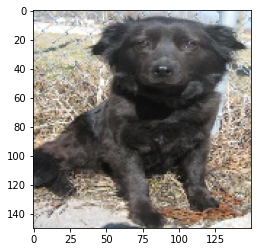

In [46]:
x,y = train_generator.next()

for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [35]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/cats-vs-dogs/testing',
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 4740 images belonging to 2 classes.


(150, 150, 3)


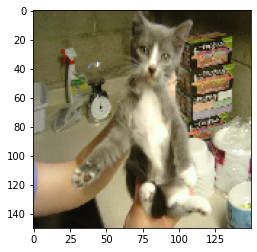

In [47]:
x,y = validation_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [37]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), input_shape=(150,150,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/100
100/100 [==============================] - 6s 57ms/step - loss: 0.7129 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 2/100
100/100 [==============================] - 6s 55ms/step - loss: 0.6931 - accuracy: 0.5190 - val_loss: 0.6918 - val_accuracy: 0.5640
Epoch 3/100
100/100 [==============================] - 6s 56ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5260
Epoch 4/100
100/100 [==============================] - 6s 55ms/step - loss: 0.6913 - accuracy: 0.5270 - val_loss: 0.6927 - val_accuracy: 0.4920
Epoch 5/100
100/100 [==============================] - 6s 56ms/step - loss: 0.6902 - accuracy: 0.5260 - val_loss: 0.6923 - val_accuracy: 0.4580
Epoch 6/100
100/100 [==============================] - 6s 56ms/step - loss: 0.6907 - accuracy: 0.5140 - val_loss: 0.6973 - val_accuracy: 0.4980
Epoch 7/100
100/100 [==============================] - 5s 54ms/step - loss: 0.6846 - accuracy: 0.5150 - val_loss: 0.6842 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 6s 55ms/step - loss: 0.6793 - accuracy: 0.5710 - val_loss: 0.6887 - val_accuracy: 0.5200
Epoch 16/100
100/100 [==============================] - 5s 54ms/step - loss: 0.6759 - accuracy: 0.5790 - val_loss: 0.6550 - val_accuracy: 0.6380
Epoch 17/100
100/100 [==============================] - 5s 55ms/step - loss: 0.6742 - accuracy: 0.5910 - val_loss: 0.6647 - val_accuracy: 0.6060
Epoch 18/100
100/100 [==============================] - 6s 55ms/step - loss: 0.6610 - accuracy: 0.5940 - val_loss: 0.6475 - val_accuracy: 0.6400
Epoch 19/100
100/100 [==============================] - 5s 55ms/step - loss: 0.6652 - accuracy: 0.5860 - val_loss: 0.6793 - val_accuracy: 0.5400
Epoch 20/100
100/100 [==============================] - 6s 56ms/step - loss: 0.6621 - accuracy: 0.6080 - val_loss: 0.6530 - val_accuracy: 0.6160
Epoch 21/100
100/100 [==============================] - 6s 56ms/step - loss: 0.6616 - accuracy: 0.5940 - val_loss: 0.6732 - val_accuracy: 0.580

In [40]:
import matplotlib.pyplot as plt

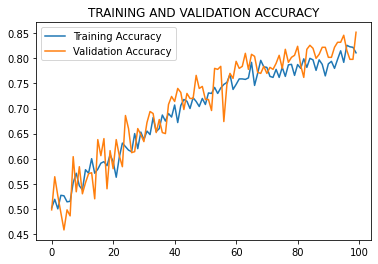

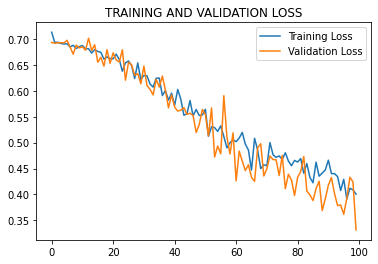

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.legend()

In [48]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print('It is a dog')
  else: 
    print('It is a cat')

Saving maxresdefault.jpg to maxresdefault.jpg
[1.]
It is a dog
